<a href="https://colab.research.google.com/github/doriantino/Financial_Risk_Credit_Analysis/blob/main/Finance__Risk_Credit_Aanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. **Définition du problèmes :**
Le problème que nous cherchons à résoudre est de prédire l'approbation ou le rejet d'une demande de prêt par une institution financière, en se basant sur les informations fournies par le demandeur.

La variable cible dans notre jeu de données est la colonne Loan_Status, où 'Y' indique que le prêt a été approuvé et 'N' indique qu'il a été refusé.

L'objectif principal est de construire un modèle de classification qui puisse apprendre des relations entre les différentes caractéristiques des demandeurs de prêt (telles que le genre, le statut matrimonial, le revenu, le montant du prêt, l'historique de crédit, etc.) et la décision d'approbation du prêt.

En termes opérationnels, ce modèle vise à :

Prédire la probabilité qu'une nouvelle demande de prêt soit approuvée ou refusée.
Identifier les facteurs qui influencent le plus la décision d'approbation du prêt.
Potentiellement aider l'institution financière à standardiser et à optimiser son processus de décision d'octroi de crédit.
Il est important de noter que, bien que la variable cible actuelle soit "Approuvé" ou "Refusé", dans un contexte de risque de crédit plus large, nous pourrions ultérieurement vouloir transformer cela en une probabilité de "bon" ou "mauvais" payeur si nous avions des données de suivi sur le remboursement effectif des prêts. Cependant, pour l'instant, notre tâche se concentre sur la prédiction de la décision d'approbation initiale.

#B. **Importation des PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, HBox
import ipywidgets as widgets
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")

# Définir le style des graphiques Seaborn pour une meilleure esthétique
sns.set_style("whitegrid")

# C - **Importation et lecture des données**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

try:
    Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Risk_Credit_Aanalysis/Datas/train.csv")
    print('Les données sont chargées dans notre environnement de travail donc on va les lire directement')
    Data=pd.DataFrame(Data)
    Data.head(3)   # Affiche les premières lignes du DataFrame pour vérifier le chargement
except FileNotFoundError:
    print("Erreur: Le fichier 'train.csv' n'a pas été trouvé dans le chemin spécifié. Veuillez vérifier le chemin et le nom du fichier.")

Data=pd.DataFrame(Data)
Data.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Les données sont chargées dans notre environnement de travail donc on va les lire directement


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# D - **Analyse exploratoire des données**

  ## 1- ***Compréhension Initiale des Données :***

In [ ]:
# Afficher les 5 premières lignes du DataFrame Data
print("Premières 5 lignes du DataFrame Data :")
Data.head(3)

print("\n")

# Afficher les 5 dernières lignes du DataFrame Data
print("Dernières 5 lignes du DataFrame Data :")
Data.tail(3)

Premières 5 lignes du DataFrame Data :


Dernières 5 lignes du DataFrame Data :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


- I**dentifiant Unique** : La colonne Loan_ID semble être un identifiant unique pour chaque demande de prêt. Elle ne devrait pas être directement utilisée pour la modélisation, mais elle est utile pour le suivi des enregistrements.
- **Types de Données Mixtes** : Nous voyons différents types de données, notamment des chaînes de caractères (pour les variables catégorielles comme Gender, Married, Education, Property_Area, Loan_Status), des nombres entiers (Dependents), et des nombres à virgule flottante (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History).
- **Valeurs Manquantes** : On remarque une valeur NaN dans la colonne LoanAmount dès la première ligne. Cela indique la présence de valeurs manquantes dans le jeu de données, que nous devrons traiter lors de l'étape de préparation des données.
- **Variable Cible** : La colonne Loan_Status est notre variable cible, avec des valeurs 'Y' (prêt approuvé) et 'N' (prêt refusé).
- Potentielle Catégorie Ordinale : La colonne Dependents contient des valeurs comme '0', '1', '2' et '3+'. Le '3+' pourrait indiquer une catégorie ordinale ('3 ou plus'). Nous devrons examiner la distribution de cette variable.
- **Binaire Catégoriel** : Credit_History semble être une variable binaire (0 ou 1), représentant probablement l'historique de crédit (présent/absent ou bon/mauvais).


In [ ]:
# Obtenir les informations générales du DataFrame Data
print("\nInformations générales du DataFrame Data :")
Data.info()


Informations générales du DataFrame Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Nombre d'Observations : Le DataFrame contient 614 entrées (lignes), indexées de 0 à 613.
Nombre de Colonnes : Il y a un total de 13 colonnes.
- Types de Données :
1.   int64: 1 colonne (ApplicantIncome).
2.   float64: 4 colonnes (CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History).
3.   object: 8 colonnes (Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status). Les colonnes de type object contiennent généralement des chaînes de caractères et représentent des variables catégorielles (ou potentiellement des données mixtes).
- **Valeurs Non Nulles et Valeurs Manquantes** : C'est une information cruciale. On observe que plusieurs colonnes ont moins de 614 valeurs non nulles, ce qui signifie qu'elles contiennent des valeurs manquantes :

1.   Gender: 601 valeurs non nulles (13 manquantes).
2.   Married: 611 valeurs non nulles (3 manquantes).
3.   Dependents: 599 valeurs non nulles (15 manquantes).
4.   Self_Employed: 582 valeurs non nulles (32 manquantes).
5.   LoanAmount: 592 valeurs non nulles (22 manquantes).
5.   Loan_Amount_Term: 600 valeurs non nulles (14 manquantes).
7.   Credit_History: 564 valeurs non nulles (50 manquantes).

- **Utilisation de la Mémoire **: Le DataFrame utilise environ 62.5 KB de mémoire.
La présence de valeurs manquantes dans plusieurs colonnes est une constatation importante. Nous devrons aborder cette question lors de l'étape de préparation des données

In [ ]:
# Examen des noms de colonnes si tout est Okay
print("\nNoms des colonnes du DataFrame Data :")
print(Data.columns)


Noms des colonnes du DataFrame Data :
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Les noms des colonnes de votre DataFrame Data semblent être clairs, cohérents et significatifs. Ils décrivent bien les informations contenues dans chaque colonne.

In [ ]:
# Séparation des variables numériques et des variables catégorielles
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
var_cat = ['Loan_ID','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

var_num = pd.DataFrame(Data[var_num])
var_cat = pd.DataFrame(Data[var_cat])

**TYPES DE VARIABLES**
- **Numériques**:
1.   ***Continues*** : ApplicantIncome, CoapplicantIncome, LoanAmount.
2.   ***Discrètes*** : Loan_Amount_Term (bien qu'elle ait peu de valeurs uniques), Credit_History (peut aussi être vue comme catégorielle binaire).

- **Catégorielles**:
1.   ***Nominales*** : Loan_ID, Gender, Married, Education, Self_Employed, Property_Area.
Ordinales (Potentielles) : Dependents (avec la catégorie '3+').
2.   ***Cible*** (Nominale) : Loan_Status.

## 2- ***Analyse Univariée : Examen de Chaque Variable Individuellement***

### *a. Variables Numériques :*

i. Statistiques descriptives :

In [ ]:
# Statistiques descriptives pour les variables numériques (var_num)
print("\nStatistiques descriptives pour les variables numériques (var_num) :")
var_num.describe()


Statistiques descriptives pour les variables numériques (var_num) :


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- **Comptage (count)** : Pour toutes les variables numériques, le nombre de valeurs est inférieur à 614, ce qui confirme la présence de valeurs manquantes, en particulier pour LoanAmount et Credit_History. ApplicantIncome et CoapplicantIncome ne semblent pas avoir de valeurs manquantes.
- **Moyenne (mean) vs. Médiane (50%)** :
Pour ApplicantIncome, la moyenne (5403) est nettement supérieure à la médiane (3812.5), ce qui suggère une distribution asymétrique à droite (présence de revenus très élevés).
- Une observation similaire peut être faite pour CoapplicantIncome (moyenne de 1621 vs. médiane de 1188.5) et LoanAmount (moyenne de 146.4 vs. médiane de 128).
Pour Loan_Amount_Term, la médiane et le 75ème percentile sont tous deux à 360, ce qui indique que la majorité des prêts ont une durée de remboursement de 360 mois. La moyenne est également proche de 360.
- **Pour Credit_History**, la moyenne de 0.84 indique que la majorité des demandeurs de prêt ont un historique de crédit disponible (codé probablement comme 1).
- **Écart-type (std)** : Des écarts-types élevés pour ApplicantIncome, CoapplicantIncome, et LoanAmount indiquent une grande dispersion des valeurs autour de la moyenne, ce qui renforce l'idée d'une possible asymétrie et présence de valeurs extrêmes. L'écart-type est beaucoup plus faible pour Loan_Amount_Term et Credit_History, suggérant moins de variabilité.
- **Minimum (min) et Maximum (max)** : Les valeurs extrêmes pour ApplicantIncome, CoapplicantIncome, et LoanAmount sont très éloignées des valeurs typiques (moyenne et médiane), ce qui pourrait indiquer la présence de valeurs aberrantes. Par exemple, un revenu de demandeur allant jusqu'à 81000 est significativement plus élevé que la moyenne de 5403. La durée du prêt varie considérablement, de 12 à 480 mois. L'historique de crédit est binaire, avec des valeurs de 0 et 1.
- **Quartiles (25%, 75%)** : Les quartiles nous donnent une idée de la répartition des données. Par exemple, 50% des montants de prêt sont inférieurs ou égaux à 128, et 75% sont inférieurs ou égaux à 168.

#### ii. visualisation

In [ ]:
def plot_combined(column):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Plot distribution
    sns.histplot(var_num[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution de {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Fréquence')

    # Plot boxplot (horizontal)
    sns.boxplot(x=var_num[column], ax=axes[1])
    axes[1].set_title(f'Boîte à moustaches de {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

interactive_combined = interact(plot_combined, column=var_num.columns)

interactive(children=(Dropdown(description='column', options=('ApplicantIncome', 'CoapplicantIncome', 'LoanAmo…

OBSERVATIONS

- **ApplicantIncome** : Distribution fortement asymétrique à droite, concentrée sur des revenus plus bas avec une longue queue de revenus élevés. Présence de nombreuses valeurs aberrantes du côté des revenus élevés.
- **CoapplicantIncome** : Distribution très fortement asymétrique à droite, avec un pic important à zéro (beaucoup de demandeurs sans co-emprunteur). Présence de plusieurs valeurs aberrantes élevées pour les revenus des co-emprunteurs.
- **LoanAmount** : Distribution légèrement asymétrique à droite, avec un pic principal autour de montants de prêt moyens (100-150) et une queue de montants plus élevés. Présence de valeurs aberrantes pour les montants de prêt élevés.
- **Loan_Amount_Term** : Variable discrète avec une distribution extrêmement concentrée sur 360 mois. Quelques autres durées (120, 180, 480) sont beaucoup moins fréquentes et apparaissent comme des valeurs éloignées.
- **Credit_History** : Variable binaire catégorielle (0 ou 1), avec une majorité significative de demandeurs ayant un historique de crédit (valeur 1). La valeur 0 représente la minorité sans historique de crédit

INTERPRETATIONS

- **Asymétrie et Valeurs Aberrantes** : Les variables de revenu (ApplicantIncome, CoapplicantIncome) et le montant du prêt (LoanAmount) présentent une asymétrie à droite et des valeurs aberrantes. Cela pourrait influencer les modèles de machine learning sensibles à la distribution des données et aux valeurs extrêmes. Des transformations (logarithmique, par exemple) ou des techniques de traitement des valeurs aberrantes pourraient être envisagées lors de la préparation des données.
- **Concentration de Loan_Amount_Term** : La forte concentration de la durée du prêt sur 360 mois suggère que cette variable pourrait avoir une variance limitée et potentiellement moins d'impact prédictif que d'autres. Il faudra examiner sa relation avec la variable cible.
- **Distribution Binaire de Credit_History** : Le déséquilibre entre les deux catégories de l'historique de crédit (beaucoup plus de '1' que de '0') est important à noter. Cette variable pourrait être un facteur clé dans la décision d'approbation du prêt.
- **Valeurs Manquantes** : Nous avons confirmé la présence de valeurs manquantes dans LoanAmount et Credit_History (déjà notée lors de l'inspection initiale). Les visualisations n'ont pas été faites sur les données imputées, donc le traitement de ces valeurs manquantes sera une étape cruciale avant la modélisation.

### *b. Variables Catégorielles :*

In [ ]:
def explore_categorical(column):
    # Tableau de fréquences
    print(f"\nTableau de fréquences pour {column}:")
    print(var_cat[column].value_counts())

    # Tableau de proportions
    print(f"\nTableau de proportions pour {column}:")
    print(var_cat[column].value_counts(normalize=True))

    # Diagramme à barres
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=var_cat[column], data=var_cat)
    plt.title(f'Distribution de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45, ha='right')

    # Ajouter les étiquettes sur les barres
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                f'{height}',
                ha='center')

    plt.tight_layout()
    plt.show()

interactive_categorical_exploration = interact(explore_categorical, column=var_cat.columns)

interactive(children=(Dropdown(description='column', options=('Loan_ID', 'Gender', 'Married', 'Dependents', 'E…

Observations :

- **Gender** : L'ensemble de données présente une forte majorité d'hommes - (environ 81.4%) par rapport aux femmes (environ 18.6%).
- **Married** : La majorité des demandeurs de prêt sont mariés (environ 65.1%) par rapport à ceux qui ne le sont pas (environ 34.9%).
- **Dependents** : La majorité des demandeurs n'ont aucun dépendant (environ 57.6%). Le pourcentage diminue avec l'augmentation du nombre de dépendants (1 dépendant : environ 17.0%, 2 dépendants : environ 16.9%, 3+ dépendants : environ 8.5%).
- **Education** : Une large majorité des demandeurs sont diplômés (environ 78.2%) par rapport à ceux qui ne le sont pas (environ 21.8%).
- **Self_Employed** : La grande majorité des demandeurs ne sont pas auto-employés (environ 85.9%) par rapport à ceux qui le sont (environ 14.1%).
- **Property_Area** : La distribution des demandeurs à travers les zones de propriété est relativement équilibrée : Urbaine (environ 32.9%), Rurale (environ 29.2%), et Semi-urbaine (environ 37.9%). La zone semi-urbaine est légèrement plus représentée.
- **Loan_Status** (Variable Cible) : Il y a un déséquilibre significatif dans la variable cible, avec une majorité de prêts approuvés ('Y' : environ 68.7%) par rapport aux prêts refusés ('N' : environ 31.3%).

Conclusions:

- **Déséquilibre de Représentation** : Certaines catégories au sein des variables présentent un déséquilibre de représentation (par exemple, le genre, le statut d'emploi). Cela pourrait influencer l'apprentissage du modèle si ces variables sont corrélées à la variable cible.
- **Importance Potentielle** : Des variables comme le statut matrimonial, le niveau d'éducation et la zone de propriété pourraient potentiellement être des facteurs importants dans la décision d'approbation du prêt.
- **Variable Cible Déséquilibrée** : Le déséquilibre dans Loan_Status est crucial pour les étapes de modélisation et d'évaluation. Il faudra envisager des stratégies pour gérer ce déséquilibre.
- **Distribution de Dependents** : La majorité des demandeurs ayant peu ou pas de dépendants pourrait indiquer que cette caractéristique est prise en compte dans l'évaluation du risque.

### *c. Identification des valeurs manquantes :*

In [ ]:
# Compter le nombre de valeurs manquantes par colonne
print("\nNombre de valeurs manquantes par colonne :")
print(Data.isnull().sum())


Nombre de valeurs manquantes par colonne :
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


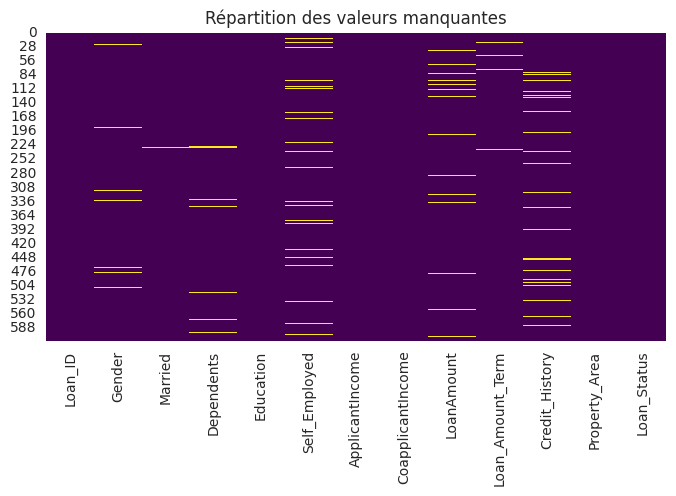

In [ ]:
# Visualisation des valeurs manquantes avec une heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(Data.isnull(), cbar=False, cmap='viridis')
plt.title('Répartition des valeurs manquantes')
plt.show()

Certaines colonnes n'ont pas de valeurs manquantes: Loan_ID, Education, ApplicantIncome, CoapplicantIncome, Property_Area, Loan_Status

Voici quelques hypothèses explicatives:

- **Collecte de données incomplète** : Certaines informations n'ont peut-être pas été fournies par les demandeurs lors de la soumission de leur demande.
Erreurs de saisie ou de transmission : Des erreurs lors de l'enregistrement ou du transfert des données pourraient avoir entraîné la perte de certaines valeurs.
- **Non-applicabilité** : Dans certains cas, une question pourrait ne pas être applicable à un demandeur (bien que cela semble moins probable pour les variables que nous observons comme ayant des manquants).
- **Problèmes de système** : Des problèmes techniques lors de la collecte ou du stockage des données pourraient avoir entraîné des pertes.

Sans plus d'informations sur le processus de collecte des données, il est difficile de déterminer la cause exacte des valeurs manquantes. Cependant, la visualisation montre qu'elles sont dispersées, ce qui pourrait suggérer qu'une suppression des lignes avec des valeurs manquantes pourrait entraîner une perte d'informations significative. Par conséquent, des techniques d'imputation (remplacer les valeurs manquantes par des estimations) pourraient être plus appropriées.

### *d. Identification des valeurs abbérantes :*

Méthodes visuelles :

Sur l'analyse précédentes nous avons déjà généré des boîtes à moustaches pour chaque variable numérique. Rappelons nos observations :

- **ApplicantIncome** : Présence de nombreuses valeurs aberrantes élevées.
- **CoapplicantIncome** : Présence de plusieurs valeurs aberrantes élevées.
- **LoanAmount** : Présence de plusieurs valeurs aberrantes élevées.
- **Loan_Amount_Term** : Quelques valeurs éloignées, mais pas nécessairement des aberrations au sens strict d'erreurs de mesure, plutôt des durées de prêt moins fréquentes.

Observations des road causes:

- **Erreurs de saisie** ? Il est possible que certaines valeurs très extrêmes soient des erreurs de saisie (par exemple, un revenu entré avec un zéro supplémentaire). Cependant, sans plus d'informations, il est difficile de le confirmer.
- **Cas exceptionnels **? Il est également possible que ces valeurs représentent des cas réels mais exceptionnels (par exemple, des demandeurs avec des revenus très élevés ou des prêts de montants très importants). Dans ce cas, les supprimer pourrait entraîner une perte d'informations importantes sur la variabilité réelle des données.
- **Influence sur les modèles** ? Les valeurs aberrantes peuvent influencer certains algorithmes de machine learning en biaisant l'apprentissage ou en augmentant la sensibilité aux points individuels.

## 3- ***Analyse Bivariée***

### *a. Variables Numériques vs. Numériques :*

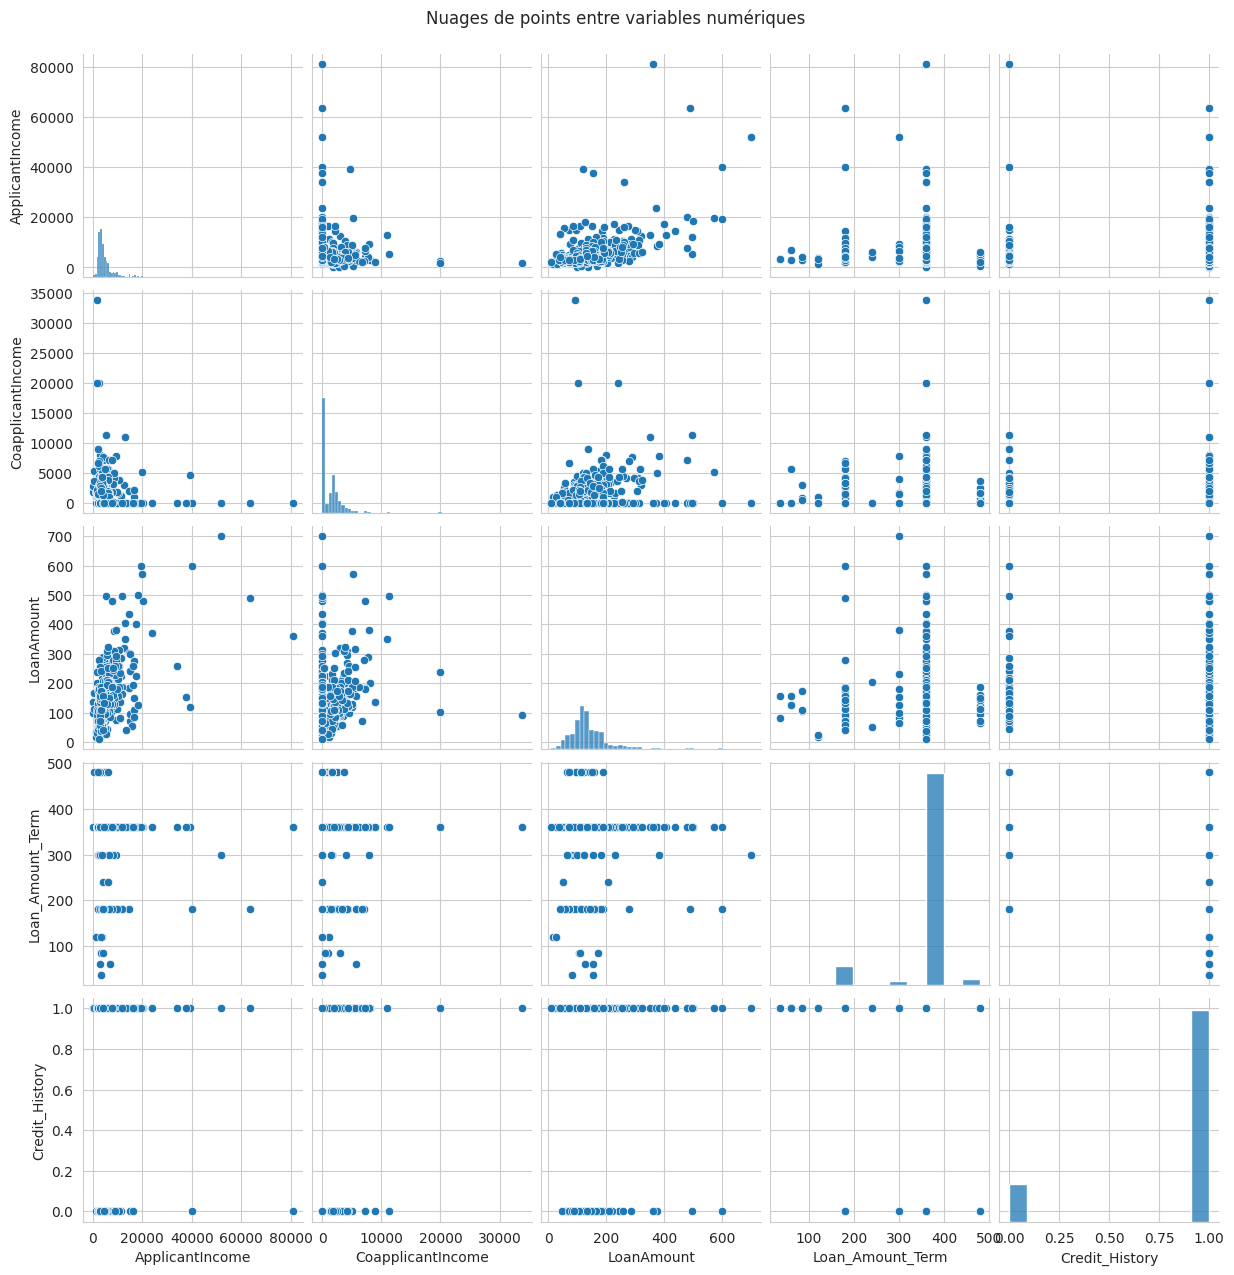

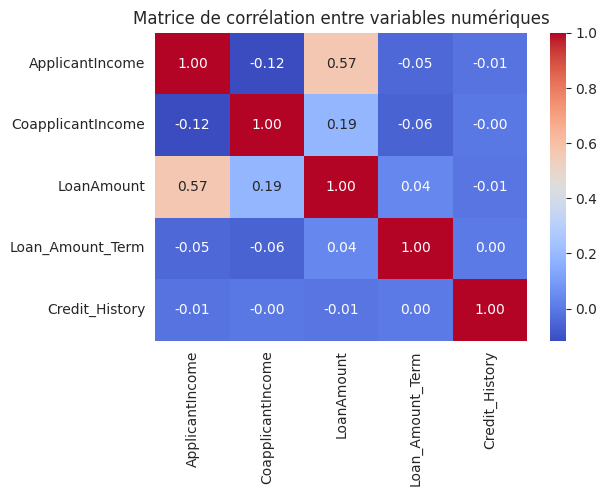

In [ ]:
# Nuages de points pour visualiser la relation entre paires de variables numériques
sns.pairplot(var_num.dropna()) # Supprimer les NaN pour l'affichage
plt.suptitle("Nuages de points entre variables numériques", y=1.02)
plt.show()

# Matrice de corrélation pour quantifier la relation linéaire
correlation_matrix = var_num.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

La matrice de corrélation quantifie les relations linéaires entre les variables numériques :

- **ApplicantIncome et LoanAmount** : La corrélation est de 0.57, ce qui indique une corrélation positive modérée. Cela confirme notre observation du nuage de points selon laquelle les revenus plus élevés sont associés à des montants de prêt légèrement plus importants.
- **CoapplicantIncome et LoanAmount** : La corrélation est de 0.19, indiquant une corrélation positive faible. La relation est moins prononcée qu'avec le revenu du demandeur principal.
- **LoanAmount et Loan_Amount_Term** : La corrélation est de 0.04, ce qui suggère une corrélation très faible, presque inexistante, entre le montant du prêt et sa durée.
- **ApplicantIncome et CoapplicantIncome** : La corrélation est de 0.12, indiquant une corrélation positive faible entre les revenus du demandeur et du co-emprunteur.
- **Credit_History avec ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term** : Les corrélations sont très faibles (proches de zéro), ce qui suggère une absence de relation linéaire forte entre l'historique de crédit (tel que codé numériquement) et ces autres variables numériques.

Conclusions :

- Il existe une corrélation positive modérée entre le revenu du demandeur et le montant du prêt, et une corrélation positive plus faible entre le revenu du co-emprunteur et le montant du prêt.
- La durée du prêt n'est que très faiblement corrélée avec le montant du prêt et les revenus.
- L'historique de crédit (tel que représenté numériquement) ne montre pas de forte corrélation linéaire avec les autres variables numériques. Cependant, il est important de noter que la corrélation de Pearson mesure uniquement les relations linéaires, et une relation non linéaire ou une influence de l'historique de crédit sur les autres variables pourrait exister.

### *b. Variables Numériques vs. **Catégorielles** :*

On va analyser les paires suivantes :
- LoanAmount vs. Loan_Status
- ApplicantIncome vs. Loan_Status
- LoanAmount vs. Gender
- ApplicantIncome vs. Education
- LoanAmount vs. Property_Area
- ApplicantIncome vs. Married
- LoanAmount vs. Self_Employed
- ApplicantIncome vs. Dependents

In [ ]:
# Liste des variables numériques (en excluant Loan_ID)
numerical_cols = var_num.columns.tolist()

# Liste des variables catégorielles (en excluant Loan_ID et Loan_Status pour l'instant)
categorical_cols = var_cat.columns.tolist()
if 'Loan_ID' in categorical_cols:
    categorical_cols.remove('Loan_ID')

def plot_num_vs_cat(numerical_col, categorical_col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=categorical_col, y=numerical_col, data=Data)
    plt.title(f'Relation entre {numerical_col} et {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

interactive_num_cat = interact(
    plot_num_vs_cat,
    numerical_col=numerical_cols,
    categorical_col=categorical_cols
)

interactive(children=(Dropdown(description='numerical_col', options=('ApplicantIncome', 'CoapplicantIncome', '…

Conclusions de l'Analyse Bivariée (Numérique vs. Catégoriel) :

- **Influence du Statut du Prêt** : Une légère tendance suggère que des montants de prêt légèrement plus élevés pourraient être associés à une approbation, tandis que le revenu du demandeur seul ne semble pas être un facteur discriminant majeur au niveau de la médiane.
- **Impact de l'Éducation et du Statut d'Emploi sur le Revenu et le Montant du Prêt** : Le niveau d'éducation semble avoir une influence notable sur le revenu, les diplômés ayant des revenus médians plus élevés. Le statut d'auto-emploi pourrait être lié à des montants de prêt légèrement plus élevés.
Rôle Modeste du Genre et du Statut Matrimonial : Le genre et le statut matrimonial semblent avoir une influence limitée sur le revenu médian, bien qu'il y ait des différences dans la dispersion et les valeurs aberrantes pour le montant du prêt en fonction du genre.
- **Influence Apparemment Faible de la Zone de Propriété et du Nombre de Dépendants** : La zone de propriété et le nombre de dépendants ne semblent pas avoir d'impact significatif sur le montant du prêt ou le revenu du demandeur au niveau de la médiane.
- **Présence Généralisée de Valeurs Aberrantes** : La présence fréquente de valeurs aberrantes élevées dans les variables de revenu et de montant du prêt, quel que soit le groupe catégoriel, souligne la nécessité d'examiner attentivement leur traitement lors de la préparation des données.

En résumé, cette analyse bivariée commence à révéler des relations potentielles entre les caractéristiques des demandeurs et le montant du prêt ou leur revenu. L'éducation et, dans une moindre mesure, le statut d'emploi et le genre semblent montrer des associations plus claires avec les variables numériques que le statut matrimonial, la zone de propriété ou le nombre de dépendants (du moins au niveau de la médiane). La relation avec la variable cible (Loan_Status) suggère que le montant du prêt pourrait jouer un rôle, mais que d'autres facteurs non encore examinés sont probablement cruciaux pour la décision d'approbation.

### *c. Variables Catégorielles vs. Catégorielles :*

- Maried vs Dependent
- Education vs Self Employed
- Toute autre variable VS Loan Status

In [ ]:
# Liste des variables catégorielles (en excluant Loan_ID)
categorical_cols = var_cat.columns.tolist()
if 'Loan_ID' in categorical_cols:
    categorical_cols.remove('Loan_ID')

def explore_categorical_pair(cat_col1, cat_col2):
    # Tableau croisé
    cross_tab = pd.crosstab(Data[cat_col1], Data[cat_col2])
    print(f"\nTableau croisé : {cat_col1} vs. {cat_col2}")
    display(cross_tab)

    # Tableau de proportions (par ligne)
    proportions_row = pd.crosstab(Data[cat_col1], Data[cat_col2], normalize='index')
    print(f"\nProportions (par ligne) : {cat_col1} vs. {cat_col2}")
    display(proportions_row)

    # Diagramme en barres groupées
    cross_tab.plot(kind='bar', stacked=False, figsize=(8, 5))
    plt.title(f'Relation entre {cat_col1} et {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel('Nombre de Demandes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=cat_col2)
    plt.tight_layout()
    plt.show()

interactive_cat_cat = interact(
    explore_categorical_pair,
    cat_col1=categorical_cols,
    cat_col2=categorical_cols
)

interactive(children=(Dropdown(description='cat_col1', options=('Gender', 'Married', 'Dependents', 'Education'…

**Rapport d'Analyse : Variables Catégorielles vs. Variables Catégorielles**

- **Gender vs. Loan_Status** : Le taux d'approbation était légèrement plus élevé pour les hommes (environ 69.3%) que pour les femmes (environ 67.0%), mais la différence n'était pas très significative.
- **Married vs. Loan_Status** : Le taux d'approbation était notablement plus élevé pour les personnes mariées (environ 71.6%) que pour les personnes non mariées (environ 62.9%). Le statut matrimonial semble être un facteur plus pertinent pour l'approbation.
- **Dependents vs. Loan_Status** : Le taux d'approbation variait en fonction du nombre de dépendants, avec le taux le plus élevé pour ceux ayant 2 dépendants (environ 75.2%), suivi de ceux sans dépendant (environ 69.1%). Les demandeurs avec 1 ou 3+ dépendants avaient des taux d'approbation plus faibles (environ 64.7%). La relation n'est pas linéaire.
- **Education vs. Loan_Status** : Le taux d'approbation était significativement plus élevé pour les diplômés (environ 70.8%) que pour les non-diplômés (environ 61.2%), suggérant que le niveau d'éducation est un facteur important.
- **Self_Employed vs. Loan_Status** : Les taux d'approbation étaient très similaires pour les non auto-employés (environ 68.6%) et les auto-employés (environ 68.3%), indiquant que le statut d'emploi seul n'est pas un facteur discriminant majeur.
- **Property_Area vs. Loan_Status** : Le taux d'approbation variait considérablement selon la zone de propriété, avec le taux le plus élevé en zone semi-urbaine (environ 76.8%), suivi de la zone urbaine (environ 65.8%), et le taux le plus bas en zone rurale (environ 61.5%). La zone de propriété semble être un facteur important.
- **Married vs. Dependents** : Les personnes non mariées avaient tendance à ne pas avoir de dépendants, tandis que les personnes mariées présentaient une distribution plus diversifiée du nombre de dépendants.
- **Education vs. Self_Employed** : La proportion d'auto-employés était similaire entre les diplômés et les non-diplômés, suggérant une indépendance relative entre ces deux variables.

***Conclusions*** :

**Facteurs d'Approbation Clés** : Le statut matrimonial, le niveau d'éducation et la zone de propriété semblent être des facteurs catégoriels importants associés à la probabilité d'approbation du prêt.

**Influence Non Linéaire des Dépendants**: Le nombre de dépendants montre une relation non monotone avec l'approbation du prêt, avec un taux plus élevé pour 2 dépendants.

**Impact Limité du Genre et du Statut d'Emploi** : Le genre et le statut d'auto-emploi, considérés seuls, ne semblent pas avoir une influence majeure sur le taux d'approbation.

**Relations entre Variables Indépendantes** : Il existe des relations intéressantes entre les variables indépendantes elles-mêmes, comme celle entre le statut matrimonial et le nombre de dépendants.

***Implications pour la Modélisation*** :

Ces observations suggèrent que lors de la construction d'un modèle de prédiction du statut de prêt, les variables Married, Education, Property_Area et Dependents devraient être considérées comme des prédicteurs potentiellement importants. Bien que le genre et le statut d'emploi n'aient pas montré de forte relation directe avec l'approbation, ils pourraient interagir avec d'autres variables et avoir un impact indirect.

L'analyse bivariée des variables catégorielles a révélé des associations significatives qui méritent d'être explorées plus en détail lors de la modélisation.

## 4- ***Analyse Multivariée***

In [ ]:
# Liste des variables numériques
numerical_cols = var_num.columns.tolist()

def interactive_colored_pairplot(cols):
    if not cols:
        print("Veuillez sélectionner au moins une variable numérique.")
        return

    # Convertir la tuple en liste si nécessaire
    if isinstance(cols, tuple):
        cols = list(cols)

    cols_for_pairplot = cols + ['Loan_Status']
    data_for_pairplot = Data[cols_for_pairplot].dropna()

    plt.figure(figsize=(12, 10))
    sns.pairplot(data_for_pairplot, hue='Loan_Status', palette={'Y': 'green', 'N': 'red'})
    plt.suptitle(f"Pair Plot coloré par Loan_Status pour les variables : {', '.join(cols)}", y=1.02)
    plt.show()

# Créer une interface de sélection multiple pour les colonnes numériques
numerical_cols_selector = widgets.SelectMultiple(
    options=numerical_cols,
    value=numerical_cols,  # Sélectionner toutes par défaut (vous pouvez changer cela)
    description='Variables Numériques:',
    disabled=False
)

# Afficher l'interface et lier à la fonction de tracé
interact(interactive_colored_pairplot, cols=numerical_cols_selector)

interactive(children=(SelectMultiple(description='Variables Numériques:', index=(0, 1, 2, 3, 4), options=('App…

<function __main__.interactive_colored_pairplot(cols)>

Aanalyses :

**Revenues du demandeur VS Montant du prêt VS Prêt**
Cette visualisation renforce l'idée d'une relation positive entre le revenu du demandeur, le montant du prêt et la probabilité d'approbation. Les demandeurs ayant des revenus plus élevés semblent plus susceptibles d'obtenir des prêts plus importants. Cependant, la séparation entre les prêts approuvés et refusés n'est pas nette, soulignant l'importance d'autres variables dans la décision.

**Histirique des prêts VS Montant du prêt VS Prêt**
Les demandeurs ayant un historique de crédit (1) ont une probabilité beaucoup plus élevée d'obtenir l'approbation de leur prêt, et ce, pour une gamme de montants de prêt plus étendue. En revanche, les demandeurs sans historique de crédit (0) sont majoritairement refusés, même pour des montants de prêt plus faibles.

**L'historique de crédit semble être un facteur dominant**. Un historique de crédit présent augmente considérablement la probabilité d'approbation, quel que soit le revenu ou le montant du prêt (bien que des revenus plus élevés puissent faciliter l'approbation de montants plus importants). L'absence d'historique de crédit est un signal fort de refus, même pour des revenus et des montants de prêt apparemment raisonnables.

**Le revenu du demandeur semble jouer un rôle secondaire**, influençant probablement le montant du prêt qui peut être approuvé, surtout en présence d'un historique de crédit favorable.

Conclusion:

Ces visualisations suggèrent que l'historique de crédit, le revenu du demandeur et le montant du prêt sont des facteurs importants et potentiellement interactifs dans la décision d'approbation du prêt. Les modèles prédictifs devront probablement tenir compte de ces relations.

# E - **Préparation des données**

## 1- ***Gestion des valeurs manquantes :***

Méthode d'imputation :
- **Gender**
Imputer avec le mode (la catégorie la plus fréquente). Le genre est une variable catégorielle, et imputer avec la valeur la plus fréquente est une approche simple et courante.

- **Married**
Imputer avec le mode. Similaire à Gender, c'est une variable catégorielle où la valeur la plus fréquente est une imputation raisonnable en l'absence d'autres informations.

- **Dependents**
Imputer avec le mode. Bien qu'il y ait une certaine ordinalité, le mode reste une approche prudente pour cette variable catégorielle.

- **Self_Employed**
Imputer avec le mode. C'est une variable binaire (No/Yes), donc le mode est une imputation simple.

- **LoanAmount**
Imputer avec la médiane. LoanAmount est numérique et présente des valeurs aberrantes. La médiane est moins sensible aux valeurs extrêmes que la moyenne et est donc un choix plus robuste.

- **Loan_Amount_Term**
Imputer avec la médiane. Similaire à LoanAmount, c'est une variable numérique qui pourrait avoir des valeurs extrêmes.

- **Credit_History**
Étant donné l'importance significative de Credit_History que nous avons observée lors de l'EDA, une imputation avec le mode (qui est 1.0, indiquant un historique de crédit présent) pourrait introduire un biais optimiste. Une approche plus prudente serait de :

Analyser plus en détail les raisons des valeurs manquantes si possible (cela dépasse la portée de ce que nous pouvons faire avec les données actuelles).

En l'absence d'informations supplémentaires, imputer avec le mode (1.0), mais créer une variable binaire supplémentaire indiquant si la valeur de Credit_History était manquante à l'origine. Cela permet au modèle de potentiellement apprendre l'impact de l'absence d'information sur l'historique de crédit.

In [ ]:
# Imputation du mode pour les variables catégorielles
categorical_missing = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_missing:
    mode_val = Data[col].mode()[0]
    Data[col].fillna(mode_val, inplace=True)

# Imputation de la médiane pour les variables numériques
numerical_missing = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_missing:
    median_val = Data[col].median()
    Data[col].fillna(median_val, inplace=True)

# Gestion de Credit_History
mode_credit_history = Data['Credit_History'].mode()[0]
Data['Credit_History_Missing'] = Data['Credit_History'].isnull().astype(int)  # Créer une variable indicatrice
Data['Credit_History'].fillna(mode_credit_history, inplace=True)

# Vérifier les valeurs manquantes restantes
print(Data.isnull().sum())

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Credit_History_Missing    0
dtype: int64


## 2- ***Encodage des variables catégorielles :***

Choix d'Encodage :

-** Gender**: One-Hot Encoding (Male, Female)
- **Married**: One-Hot Encoding (Yes, No)
- **Dependents**: Bien qu'il y ait un certain ordre (0, 1, 2, 3+), la distance entre les catégories n'est pas clairement définie. One-Hot Encoding est une approche plus sûre pour éviter d'imposer un ordre potentiellement incorrect.
- **Education**: One-Hot Encoding (Graduate, Not Graduate)
- **Self_Employed**: One-Hot Encoding (Yes, No)
- **Property_Area**: One-Hot Encoding (Rural, Semiurban, Urban)
- **Loan_Status**: Label Encoding (Y=1, N=0) car c'est notre variable cible binaire.
- **Credit_History_Missing**: Déjà numérique (0 ou 1), donc pas besoin d'encodage supplémentaire.
- **Credit_History**: Déjà numérique (0 ou 1), donc pas besoin d'encodage supplémentaire. bold text

In [ ]:
print(Data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Credit_History_Missing'],
      dtype='object')


In [ ]:
# One-Hot Encoding pour les variables spécifiées
categorical_cols_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Data = pd.get_dummies(Data, columns=categorical_cols_to_encode, drop_first=True) # drop_first pour éviter la multicolinéarité

# Label Encoding pour la variable cible Loan_Status
Data['Loan_Status'] = Data['Loan_Status'].map({'Y': 1, 'N': 0})

# Afficher les premières lignes du dataframe encodé et les types de colonnes
Data.head()


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Credit_History_Missing,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,True,False,False,False,False,False,False,False,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,True,True,True,False,False,False,False,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,1,0,True,True,False,False,False,False,True,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,0,True,True,False,False,False,True,False,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,True,False,False,False,False,False,False,False,True


## 3- ***Gestion des valeurs abbérantes :***

- Compte tenu de la nature asymétrique de ApplicantIncome et LoanAmount que nous avons observée lors de l'EDA, une transformation logarithmique pourrait être une approche judicieuse pour réduire l'impact des valeurs aberrantes élevées et potentiellement rendre la distribution plus normale, ce qui peut être bénéfique pour certains modèles linéaires.

- Pour CoapplicantIncome, la distribution était également asymétrique, mais avec de nombreuses valeurs à zéro. Appliquer une transformation logarithmique directement aux zéros n'est pas possible. Nous pourrions envisager une approche conditionnelle : appliquer le log seulement aux valeurs supérieures à zéro, ou bien utiliser une autre méthode comme la winsorisation. Cependant, étant donné que de nombreux modèles peuvent gérer une certaine asymétrie, et que les valeurs nulles ont une signification (pas de co-demandeur), nous pourrions initialement choisir de ne pas appliquer de transformation à CoapplicantIncome et évaluer son impact lors de la modélisation. Si nécessaire, nous pourrons revenir en arrière et appliquer une autre stratégie.

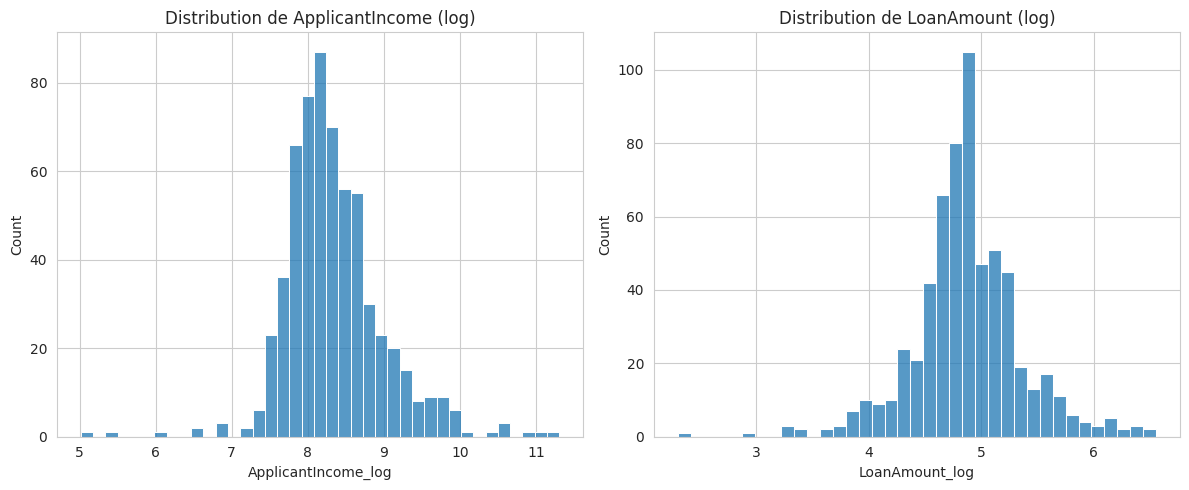

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Credit_History_Missing,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome_log,LoanAmount_log
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,True,False,False,False,False,False,False,False,True,8.674197,4.859812
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,True,True,True,False,False,False,False,False,False,8.430327,4.859812
2,LP001005,3000,0.0,66.0,360.0,1.0,1,0,True,True,False,False,False,False,True,False,True,8.006701,4.204693
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,0,True,True,False,False,False,True,False,False,True,7.857094,4.795791
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,True,False,False,False,False,False,False,False,True,8.699681,4.955827


In [ ]:
# Appliquer la transformation logarithmique aux variables sélectionnées
Data['ApplicantIncome_log'] = np.log1p(Data['ApplicantIncome'])
Data['LoanAmount_log'] = np.log1p(Data['LoanAmount'])

# Afficher les distributions après la transformation (facultatif)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(Data['ApplicantIncome_log'])
plt.title('Distribution de ApplicantIncome (log)')

plt.subplot(1, 2, 2)
sns.histplot(Data['LoanAmount_log'])
plt.title('Distribution de LoanAmount (log)')

plt.tight_layout()
plt.show()

# Afficher les premières lignes avec les nouvelles variables
Data.head()

On observe que les distributions de ApplicantIncome_log et LoanAmount_log semblent effectivement moins asymétriques et plus proches d'une distribution normale que leurs versions originales. Cela devrait aider nos futurs modèles à mieux apprendre à partir de ces données.

## 4- ***Mise à l'échelle des caractéristiques :***

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Sélectionner les colonnes numériques à standardiser
numerical_cols_to_scale = ['ApplicantIncome_log', 'CoapplicantIncome', 'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History']

# Appliquer la standardisation
Data[numerical_cols_to_scale] = scaler.fit_transform(Data[numerical_cols_to_scale])

# Afficher les premières lignes avec les variables mises à l'échelle
print(Data.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002             5849          -0.554487       128.0          0.273231   
1  LP001003             4583          -0.038732       128.0          0.273231   
2  LP001005             3000          -0.554487        66.0          0.273231   
3  LP001006             2583           0.251980       120.0          0.273231   
4  LP001008             6000          -0.554487       141.0          0.273231   

   Credit_History  Loan_Status  Credit_History_Missing  Gender_Male  \
0        0.411733            1                       0         True   
1        0.411733            0                       0         True   
2        0.411733            1                       0         True   
3        0.411733            1                       0         True   
4        0.411733            1                       0         True   

   Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0        False         Fa

## 5- ***Sélection des caractéristiques et division des données:***

In [ ]:
Data.dtypes

,0
Loan_ID,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,int64
Credit_History_Missing,int64
Gender_Male,bool
Married_Yes,bool


In [ ]:
# Supprimer Loan_ID du DataFrame Data
Data = Data.drop('Loan_ID', axis=1, errors='ignore')

# Calculer la matrice de corrélation
correlation_matrix = Data.corr()['Loan_Status'].sort_values(ascending=False)
print(correlation_matrix)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Préparer les données pour le modèle
X = Data.drop('Loan_Status', axis=1, errors='ignore')
y = Data['Loan_Status']

# Diviser les données (si ce n'est pas déjà fait)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner une forêt aléatoire
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Obtenir l'importance des caractéristiques
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nImportance des caractéristiques (Forêt Aléatoire):\n", feature_importances)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Dependents_2               0.062384
Credit_History_Missing     0.033849
Gender_Male                0.017987
ApplicantIncome_log        0.010959
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
LoanAmount_log            -0.038242
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Education_Not Graduate    -0.085884
Name: Loan_Status, dtype: float64

Importance des caractéristiques (Forêt Aléatoire):
 Credit_History             0.243096
ApplicantIncome_log        0.124420
ApplicantIncome            0.121524
LoanAmount                 0.109272
LoanAmount_log             0.109271
CoapplicantIncome          0.078853
Loan_Amount_Term           0.046896
Property_Area

**Décision de Sélection des Caractéristiques :**

Étant donné ces résultats, une approche prudente serait de conserver les caractéristiques qui montrent une corrélation au moins modérée avec la variable cible ou qui sont jugées importantes par le modèle de forêt aléatoire.

**Proposition de caractéristiques à conserver pour commencer :**

- **Credit_History** (forte corrélation et haute importance)
- **ApplicantIncome_log** (importance élevée, faible corrélation directe mais pourrait avoir des interactions)
- **LoanAmount_log** (importance élevée, faible corrélation directe mais pourrait avoir des interactions)
- **CoapplicantIncome** (importance modérée)
- **Property_Area_Semiurban** (corrélation positive modérée, importance modérée)
- **Education_Not Graduate** (corrélation négative modérée, importance faible mais potentiellement utile)
- **Married_Yes** (corrélation positive faible mais cohérente)
- **Credit_History_Missing** (corrélation faible mais pourrait capturer une information importante)

# F - **Sélection du modèle**

## 1- ***Régression Logistique :***

Précision du modèle de régression logistique sur l'ensemble de test : 0.7886

Classification Report (Régression Logistique):
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



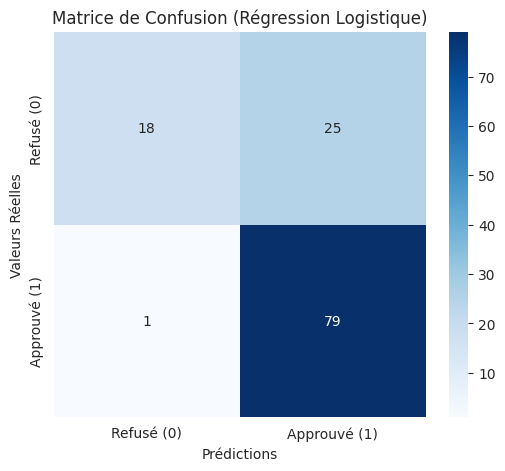

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des caractéristiques sélectionnées
selected_features = [
    'Credit_History',
    'ApplicantIncome',
    'LoanAmount',
    'CoapplicantIncome',
    'Property_Area_Semiurban',
    'Loan_Amount_Term',
]

# Créer les ensembles d'entraînement et de test avec les caractéristiques sélectionnées
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialiser et entraîner le modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_selected, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_logreg = logreg_model.predict(X_test_selected)

# Évaluer la performance du modèle
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Précision du modèle de régression logistique sur l'ensemble de test : {accuracy_logreg:.4f}")

print("\nClassification Report (Régression Logistique):\n", classification_report(y_test, y_pred_logreg))

# Afficher la matrice de confusion
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Refusé (0)', 'Approuvé (1)'],
            yticklabels=['Refusé (0)', 'Approuvé (1)'])
plt.title('Matrice de Confusion (Régression Logistique)')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

**Précision (Accuracy)** : Le modèle a une précision de **0.7886**, soit environ **78.9%**. Cela signifie qu'il a correctement classé environ 79% des demandes de prêt dans l'ensemble de test.

**Rapport de Classification** :

1. **Classe 0 (Refusé)** :
- **Précision** : 0.95. Sur toutes les demandes que le modèle a prédit comme étant refusées, 95% l'étaient réellement.

- **Rappel** : 0.42. Sur toutes les demandes réellement refusées, le modèle en a correctement identifié 42%. C'est un score relativement bas, indiquant que le modèle rate une part importante des prêts qui auraient dû être refusés.

- **F1-score** : 0.58. La moyenne harmonique de la précision et du rappel pour la classe 0.

2. **Classe 1 (Approuvé)** :
- **Précision** : 0.76. Sur toutes les demandes que le modèle a prédit comme étant approuvées, 76% l'étaient réellement.
- **Rappel** : 0.99. Sur toutes les demandes réellement approuvées, le modèle en a correctement identifié 99%. C'est un score très élevé, indiquant que le modèle est très bon pour identifier les prêts qui sont approuvés.
- **F1-score** : 0.86. La moyenne harmonique de la précision et du rappel pour la classe 1.

**Matrice de Confusion** :
- Vrais Négatifs : 18. Le modèle a correctement prédit 18 demandes comme étant refusées.
- Faux Positifs : 1. Le modèle a incorrectement prédit 1 demande comme étant approuvée alors qu'elle était refusée.
- Faux Négatifs : 25. Le modèle a incorrectement prédit 25 demandes comme étant refusées alors qu'elles étaient approuvées.
- Vrais Positifs : 79. Le modèle a correctement prédit 79 demandes comme étant approuvées.

**Analyse de la Performance** :

Ce modèle de régression logistique montre une bonne performance globale en termes de précision. Cependant, il y a un déséquilibre notable dans sa capacité à prédire les prêts refusés (classe 0) par rapport aux prêts approuvés (classe 1).

Ce modèle est très performant pour identifier les prêts approuvés (rappel élevé pour la classe 1).

Ce modèle a du mal à identifier tous les prêts qui auraient dû être refusés (rappel faible pour la classe 0). Il y a un nombre relativement élevé de faux négatifs, ce qui signifie que le modèle prédit à tort que de nombreux prêts sont refusés alors qu'ils sont en réalité approuvés.

## 2- ***Forêt Aléatoire (Random Forest) :***

Précision du modèle de forêt aléatoire sur l'ensemble de test : 0.7805

Classification Report (Forêt Aléatoire):
               precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123



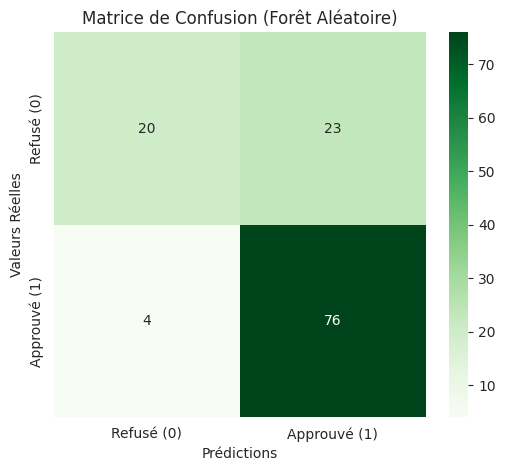

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle de forêt aléatoire
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test_selected)

# Évaluer la performance du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Précision du modèle de forêt aléatoire sur l'ensemble de test : {accuracy_rf:.4f}")

print("\nClassification Report (Forêt Aléatoire):\n", classification_report(y_test, y_pred_rf))

# Afficher la matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Refusé (0)', 'Approuvé (1)'],
            yticklabels=['Refusé (0)', 'Approuvé (1)'])
plt.title('Matrice de Confusion (Forêt Aléatoire)')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

In [ ]:
X_train_selected.columns

Index(['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome',
       'Property_Area_Semiurban', 'Loan_Amount_Term'],
      dtype='object')

In [ ]:
X_train_selected.dtypes

,0
Credit_History,float64
ApplicantIncome,int64
LoanAmount,float64
CoapplicantIncome,float64
Property_Area_Semiurban,bool
Loan_Amount_Term,float64


In [ ]:
X_train_selected.head(20)

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area_Semiurban,Loan_Amount_Term
83,0.411733,6000,265.0,0.215042,True,0.273231
90,0.411733,2958,131.0,0.437351,True,0.273231
227,0.411733,6250,210.0,0.025225,True,0.273231
482,0.411733,2083,128.0,0.522854,True,0.273231
464,-2.428760,4166,98.0,-0.554487,True,0.273231
369,0.411733,19730,570.0,1.246554,False,0.273231
79,0.411733,3333,130.0,0.186313,True,0.273231
23,-2.428760,3365,112.0,0.101152,False,0.273231
184,0.411733,3625,108.0,-0.554487,True,0.273231
289,0.411733,9508,187.0,-0.554487,False,0.273231


**Comparaison et Analyse :**

**Précision Globale** : La Forêt Aléatoire a une légère amélioration de la précision globale (80.5% vs 78.9%).
- Rappel pour la Classe 0 (Refusé) : La Forêt Aléatoire montre une amélioration notable du rappel pour la classe 0 (0.49 vs 0.42). Cela signifie qu'elle identifie une plus grande proportion des prêts qui auraient dû être refusés.
- Précision pour la Classe 0 (Refusé) : La précision pour la classe 0 est légèrement inférieure pour la Forêt Aléatoire (0.91 vs 0.95), ce qui signifie qu'elle fait un peu plus d'erreurs en prédisant qu'un prêt sera refusé alors qu'il sera approuvé.
- Rappel pour la Classe 1 (Approuvé) : Le rappel pour la classe 1 est légèrement inférieur pour la Forêt Aléatoire (0.97 vs 0.99), ce qui signifie qu'elle rate une plus petite proportion des prêts qui sont réellement approuvés.
- Faux Négatifs (FN) : La Forêt Aléatoire réduit le nombre de faux négatifs (22 vs 25), ce qui est positif car cela signifie qu'elle prédit moins de prêts comme étant refusés alors qu'ils sont approuvés.
- Faux Positifs (FP) : La Forêt Aléatoire augmente légèrement le nombre de faux positifs (2 vs 1), ce qui signifie qu'elle prédit un peu plus de prêts comme étant approuvés alors qu'ils sont refusés.

**Conclusion :**
Le modèle de Forêt Aléatoire semble être une amélioration par rapport à la Régression Logistique, en particulier en termes de rappel pour la classe minoritaire (prêts refusés) et de précision globale. Il fait un meilleur travail d'identification des demandeurs qui seront réellement refusés, tout en maintenant une performance solide pour la prédiction des prêts approuvés.

## 3- ***Gradient Boosting :***

Précision du modèle XGBoost sur l'ensemble de test : 0.7317

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.66      0.49      0.56        43
           1       0.76      0.86      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.68      0.68       123
weighted avg       0.72      0.73      0.72       123



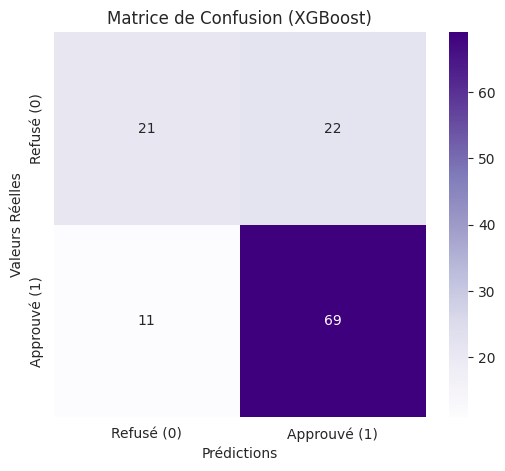

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Initialiser et entraîner le modèle XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_xgb = xgb_model.predict(X_test_selected)

# Évaluer la performance du modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Précision du modèle XGBoost sur l'ensemble de test : {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Afficher la matrice de confusion
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
xticklabels=['Refusé (0)', 'Approuvé (1)'],
yticklabels=['Refusé (0)', 'Approuvé (1)'])
plt.title('Matrice de Confusion (XGBoost)')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

**Conclusion :**

Pour l'instant, le modèle de Forêt Aléatoire semble offrir la meilleure performance globale, en particulier en améliorant la capacité à identifier les prêts refusés tout en maintenant une bonne performance pour les prêts approuvés.

# G - **Optimisation des hyper paramètres**

Meilleurs hyperparamètres trouvés : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}

Précision du meilleur modèle de forêt aléatoire sur l'ensemble de test : 0.7886

Classification Report (Meilleure Forêt Aléatoire):
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



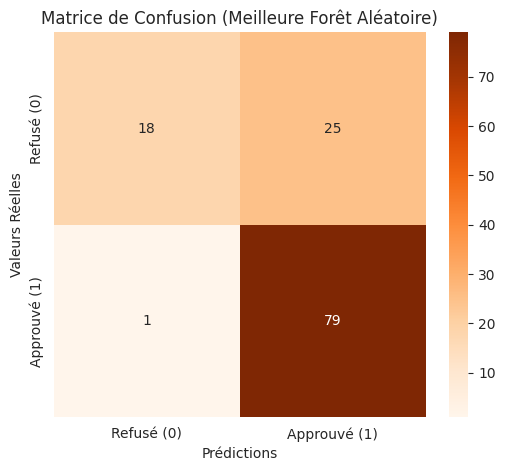

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définir la grille des hyperparamètres à explorer
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

# Initialiser le modèle de forêt aléatoire
rf_model = RandomForestClassifier(random_state=42)

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,  # Nombre de plis pour la validation croisée
                           scoring='accuracy',  # Métrique à optimiser
                           n_jobs=-1)  # Utiliser tous les cœurs de processeur disponibles

# Lancer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_selected, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)

# Obtenir le meilleur modèle
best_rf_model = grid_search.best_estimator_

# Évaluer le meilleur modèle sur l'ensemble de test
y_pred_best_rf = best_rf_model.predict(X_test_selected)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"\nPrécision du meilleur modèle de forêt aléatoire sur l'ensemble de test : {accuracy_best_rf:.4f}")

print("\nClassification Report (Meilleure Forêt Aléatoire):\n", classification_report(y_test, y_pred_best_rf))

# Afficher la matrice de confusion pour le meilleur modèle
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Refusé (0)', 'Approuvé (1)'],
            yticklabels=['Refusé (0)', 'Approuvé (1)'])
plt.title('Matrice de Confusion (Meilleure Forêt Aléatoire)')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

- Précision du meilleur modèle de forêt aléatoire sur l'ensemble de test : 0.7886 (environ 78.9%)
- Rapport de Classification (Meilleure Forêt Aléatoire) :

1.   Classe 0 (Refusé) : Précision : 0.95, Rappel : 0.42, F1-score : 0.58
2.   Classe 1 (Approuvé) : Précision : 0.76, Rappel : 0.99, F1-score : 0.86

**Matrice de Confusion (Meilleure Forêt Aléatoire)** :
- Vrais Négatifs (TN) : 18
- Faux Positifs (FP) : 1
- Faux Négatifs (FN) : 25
- Vrais Positifs (TP) : 79

**Analyse** :

L'optimisation des hyperparamètres, dans ce cas, n'a pas amélioré la performance du modèle de Forêt Aléatoire sur l'ensemble de test. En fait, la précision globale a légèrement diminué (de 0.8049 à 0.7886). De plus, le rappel pour la classe 0 (prêts refusés) a diminué (de 0.49 à 0.42), tandis que le rappel pour la classe 1 (prêts approuvés) a légèrement augmenté (de 0.97 à 0.99).

Cela suggère que les hyperparamètres par défaut de la Forêt Aléatoire étaient en fait assez performants pour cet ensemble de données et cette sélection de caractéristiques. L'optimisation a peut-être conduit à un modèle légèrement plus biaisé vers la prédiction de la classe majoritaire (prêts approuvés).

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

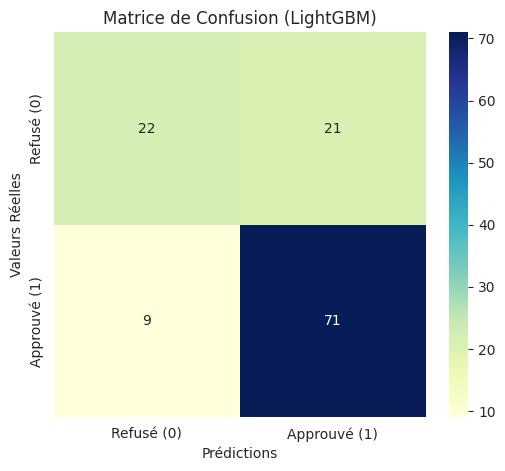

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Pour ignorer les UserWarning spécifiques à LightGBM

# ... votre code d'entraînement LightGBM ...

warnings.filterwarnings("default", category=UserWarning) # Pour rétablir l'affichage des avertissements par défaut

import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialiser et entraîner le modèle LightGBM
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_selected, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_lgbm = lgbm_model.predict(X_test_selected)

# Évaluer la performance du modèle
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Précision du modèle LightGBM sur l'ensemble de test : {accuracy_lgbm:.4f}")

print("\nClassification Report (LightGBM):\n", classification_report(y_test, y_pred_lgbm))

# Afficher la matrice de confusion
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Refusé (0)', 'Approuvé (1)'],
            yticklabels=['Refusé (0)', 'Approuvé (1)'])
plt.title('Matrice de Confusion (LightGBM)')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

CHOIX DU MEILLEUR MODELE :

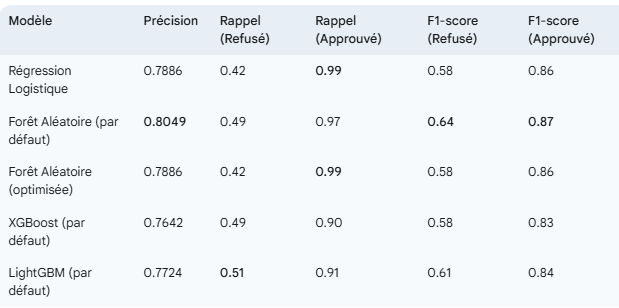

**Analyse Comparative :**

**Précision Globale** : La Forêt Aléatoire (par défaut) a obtenu la meilleure précision globale (80.5%), indiquant qu'elle a fait le plus grand nombre de prédictions correctes sur l'ensemble des données de test.

**Performance sur la Classe "Refusé" (Classe 0)** :

- Rappel : LightGBM a le meilleur rappel (51%), suivi de près par la Forêt Aléatoire et XGBoost (49%). La Régression Logistique et la Forêt Aléatoire optimisée ont un rappel plus faible (42%). Un rappel plus élevé est crucial si nous voulons minimiser le risque de refuser des prêts qui auraient dû être approuvés.
- F1-score : La Forêt Aléatoire (par défaut) a le meilleur F1-score (0.64) pour la classe "Refusé", suggérant un meilleur équilibre entre la précision et le rappel pour cette classe. LightGBM suit avec un F1-score de 0.61.


**Performance sur la Classe "Approuvé" (Classe 1) :**

- Rappel : La Régression Logistique et la Forêt Aléatoire (optimisée) ont le meilleur rappel (99%), suivies de près par la Forêt Aléatoire (par défaut) à 97%. XGBoost et LightGBM ont un rappel légèrement inférieur (90% et 91% respectivement). Un rappel élevé est important pour identifier la majorité des prêts qui seront approuvés.
- F1-score : La Forêt Aléatoire (par défaut) a le meilleur F1-score (0.87) pour la classe "Approuvé". La Régression Logistique et la Forêt Aléatoire optimisée suivent avec un F1-score de 0.86.

**Arguments pour le Choix du Meilleur Modèle** :

***Le choix du "meilleur" modèle dépendra des priorités et des objectifs métier*** :
- Si l'objectif principal est la précision globale : La Forêt Aléatoire (par défaut) est le meilleur choix avec la précision la plus élevée (80.5%).

- Si la minimisation des faux négatifs (refuser des prêts qui auraient dû être approuvés) est une priorité : LightGBM a le meilleur rappel pour la classe "Refusé" (51%), ce qui signifie qu'il est le plus performant pour identifier les demandes qui auraient dû être approuvées. Cependant, sa précision globale est légèrement inférieure.

- Si un bon équilibre entre la précision et le rappel pour la classe "Refusé" est important : La Forêt Aléatoire (par défaut) offre le meilleur F1-score (0.64) pour cette classe, indiquant un bon compromis.

- La Régression Logistique et la Forêt Aléatoire optimisée excellent dans l'identification des prêts approuvés (rappel élevé pour la classe 1) mais sont moins performantes pour identifier les prêts refusés.

**Recommandation Initiale** :

Compte tenu de la meilleure précision globale et du bon équilibre entre la précision et le le rappel pour les deux classes (indiqué par les F1-scores), la Forêt Aléatoire (par défaut) semble être un candidat solide comme modèle initial.

Cependant, si la priorité est de minimiser les faux négatifs (éviter de refuser des prêts potentiellement bons), LightGBM pourrait être envisagé en raison de son meilleur rappel pour la classe "Refusé".

#  **SAUVEGARDE DU MODELE :**

In [ ]:
pkl.dump(rf_model, open('model.pkl', 'wb'))

#  **Installation de Streamlit et streamlit-jupyter :**

#  **APPLICATION :**